In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [8]:
##Lets load the Boston House Pricing Dataset

In [53]:

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]


In [54]:
data


array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [55]:
dataset=pd.DataFrame(data)

In [56]:
dataset

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [57]:
datamake=pd.DataFrame()

In [61]:
names=["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT"]

In [64]:
for i in range(len(names)):
    datamake[names[i]]=dataset[:][i]

In [66]:
datamake["Price"]=target

In [69]:
datamake.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [71]:
import seaborn as sns
sns.pairplot(datamake)

ModuleNotFoundError: No module named 'seaborn'

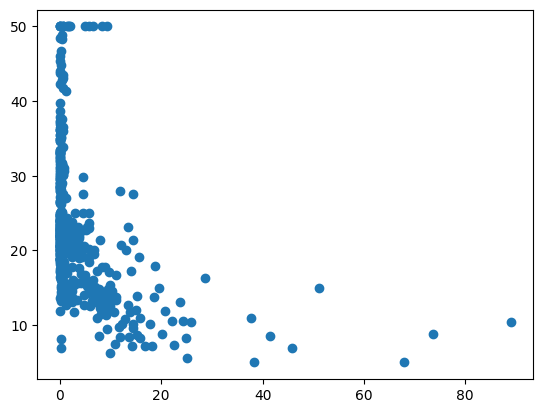

In [73]:
plt.scatter(datamake["CRIM"],datamake["Price"])

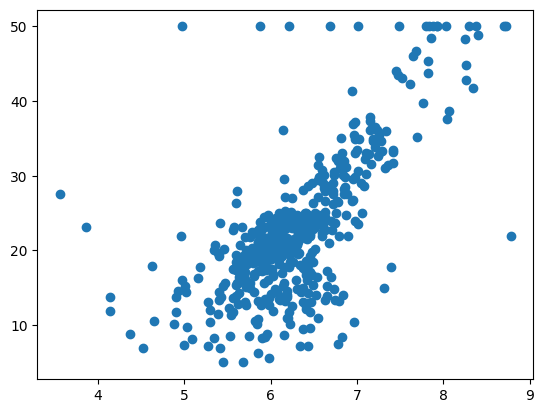

In [76]:
plt.scatter(datamake["RM"],datamake["Price"])

In [82]:
#Independent and Dependent features
Independent=datamake.iloc[:,:-1]
Dependent=datamake.iloc[:,-1]


In [85]:
#Train Test Split
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Independent,Dependent,test_size=0.3,random_state=42)

In [93]:
#Standardize the datamake
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [98]:
xtrain=scaler.fit_transform(xtrain)

In [99]:
xtest=scaler.fit_transform(xtest)

In [101]:
#Model Training
from sklearn.linear_model import LinearRegression

In [102]:
regression=LinearRegression()

In [103]:
regression.fit(xtrain,ytrain)

LinearRegression()

In [104]:
#print the coefficients and the intercept 
print(regression.coef_)

[-1.10834602  0.80843998  0.34313466  0.81386426 -1.79804295  2.913858
 -0.29893918 -2.94251148  2.09419303 -1.44706731 -2.05232232  1.02375187
 -3.88579002]


In [105]:
print(regression.intercept_)

23.01581920903955


In [106]:
regression.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [108]:
regprediction=regression.predict(xtest)

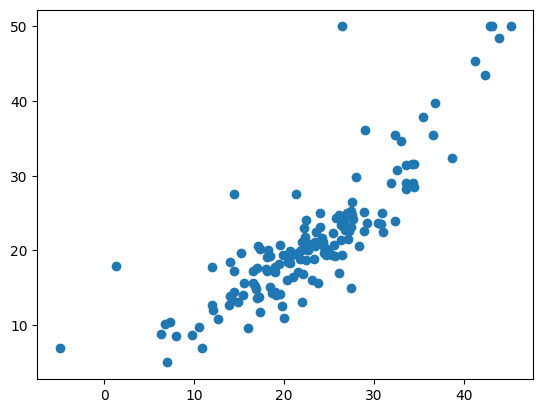

In [109]:
plt.scatter(regprediction,ytest)

In [112]:
residuals=ytest-regprediction

In [114]:
#Performance metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(ytest,regprediction))
print(mean_squared_error(ytest,regprediction))

3.744212793154548
24.13479128906756


In [115]:
#R square and adjusted R square

In [116]:
from sklearn.metrics import r2_score
score=r2_score(ytest,regprediction)
print(score)

0.6761000049033605


In [119]:
adjusted=(1-score)*(len(ytest)-1)/(len(ytest)-len(xtest[0])-1)
adjusted=1-adjusted       
print(adjusted)                   

0.6455876865246917


In [142]:
#New Data Prediction
from sklearn.preprocessing import StandardScaler
scaled=StandardScaler()

se=data[0].reshape(1,-1)
standarisedset=scaler.transform(se)
regression.predict(standarisedset)

C:\Users\prana\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([32.36964545])

In [145]:
#Picking the Model file for Deployment
import pickle
pickle.dump(regression,open("regmodel.pkl","wb"))

In [146]:
pickled_model=pickle.load(open("regmodel.pkl","rb"))

In [148]:
pickled_model.predict(standarisedset)

array([32.36964545])